**Машинное обучение (семинары в записи)**

***Урок 5. Оцениваем точность моделей с помощью разнообразных метрик***

Используя набор данных о домах, примените метрики для оценки качества модели регрессии. Затем, используя набор данных об ирисах, примените метрики для оценки качества модели классификации.

Шаги для выполнения задания:

1. Загрузите набор данных о домах и набор данных об ирисах.

2. Разделите данные на обучающую и тестовую выборки.

3. Создайте модель регрессии и обучите ее на обучающей выборке.

4. Примените метрики для оценки качества модели регрессии на тестовой выборке.

5. Создайте модель классификации и обучите ее на обучающей выборке.

6. Примените метрики для оценки качества модели классификации на тестовой выборке.

Загрузка данных

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np

In [ ]:
# Загрузка данных о домах
house_data = pd.read_csv("sample_data/boston.csv")

In [ ]:
house_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Описание столбцов датасета:

- CRIM: уровень преступности на душу населения в разбивке по городам

- ZN: доля земель под жилую застройку, разделенных на участки площадью более 25 000 кв.футов

- INDUS: доля акров, не связанных с розничной торговлей, в штате Индиана в расчете на город

- CHAS: фиктивная переменная CHAS Charles River (= 1, если участок граничит с рекой; 0 в противном случае)

- NOX: концентрация оксидов азота NOX (частей на 10 миллионов)

- RM: среднее количество комнат в жилом помещении за год

- AGE: возрастная доля квартир, занимаемых владельцами, построенных до 1940 года

- DIS: взвешенные расстояния до пяти бостонских центров занятости

- RAD: индекс доступности радиальных магистралей RAD

- TAX: налог на недвижимость по полной стоимости -ставка налога на 10 000 долларов США

- PTRATIO: соотношение количества учеников и учителей по городам

- B: в 1000(Bk - 0,63)^2, где Bk - доля чернокожих в городе

- LSTAT: на 1000 % ниже статус населения

- MEDV: средняя стоимость домов, занимаемых владельцами, в среднем на 1000 долларов

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
house_data.duplicated().sum()

0

In [ ]:
house_data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']] = house_data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']].interpolate(method='linear', limit_direction='forward')

In [ ]:
house_data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
house_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
CRIM,506.000000,3.676492,8.714302,0.006320,0.080573,0.256510,3.689388,88.976200
ZN,506.000000,11.419960,23.231082,0.000000,0.000000,0.000000,13.625000,100.000000
INDUS,506.000000,11.127105,6.853911,0.460000,5.190000,9.690000,18.100000,27.740000
CHAS,506.000000,0.067194,0.250605,0.000000,0.000000,0.000000,0.000000,1.000000
NOX,506.000000,0.554695,0.115878,0.385000,0.449000,0.538000,0.624000,0.871000
RM,506.000000,6.284634,0.702617,3.561000,5.885500,6.208500,6.623500,8.780000
AGE,506.000000,68.694071,27.909935,2.900000,45.450000,77.150000,93.975000,100.000000
DIS,506.000000,3.795043,2.105710,1.129600,2.100175,3.207450,5.188425,12.126500
RAD,506.000000,9.549407,8.707259,1.000000,4.000000,5.000000,24.000000,24.000000
TAX,506.000000,408.237154,168.537116,187.000000,279.000000,330.000000,666.000000,711.000000


In [ ]:
# Загрузка данных об ирисах
iris_data = pd.read_csv("sample_data/Iris.csv")

In [ ]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Датасет Ирисы Фишера является классическим набором данных, используемым для задач классификации в машинном обучении. Он содержит информацию о трех видах ирисов и включает четыре измеряемых характеристики.

**Описание столбцов датасета**

- Sepal Length (см): длина чашелистика (наружной доли околоцветника) в сантиметрах
- Sepal Width (см): ширина чашелистика в сантиметрах
- Petal Length (см): длина лепестка (внутренней доли околоцветника) в сантиметрах
- Petal Width (см): ширина лепестка в сантиметрах
- Species: вид ириса, к которому принадлежит образец (Iris setosa, Iris versicolor, Iris virginica)

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data.duplicated().sum()

0

In [ ]:
iris_data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris_data.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Id,150.000000,75.500000,43.445368,1.000000,38.250000,75.500000,112.750000,150.000000
SepalLengthCm,150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
SepalWidthCm,150.000000,3.054000,0.433594,2.000000,2.800000,3.000000,3.300000,4.400000
PetalLengthCm,150.000000,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000
PetalWidthCm,150.000000,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
l = LabelEncoder()
iris_data['Species'] = l.fit_transform(iris_data['Species'])

In [ ]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


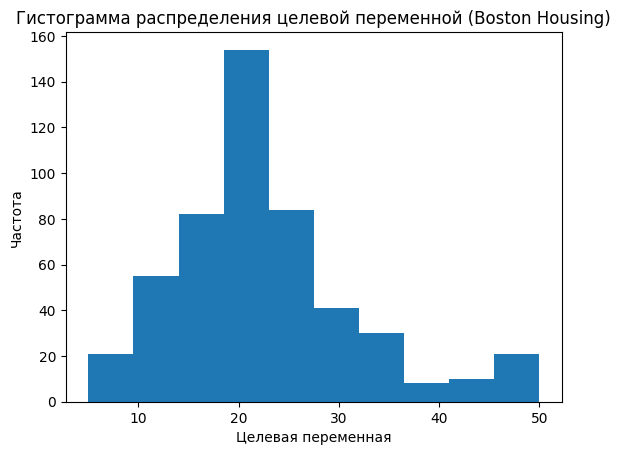

In [ ]:
plt.hist(house_data['MEDV'], bins=10)
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Гистограмма распределения целевой переменной (Boston Housing)')
plt.show();

Text(0.5, 1.0, 'Гистограмма распределения целевой переменной (Iris)')

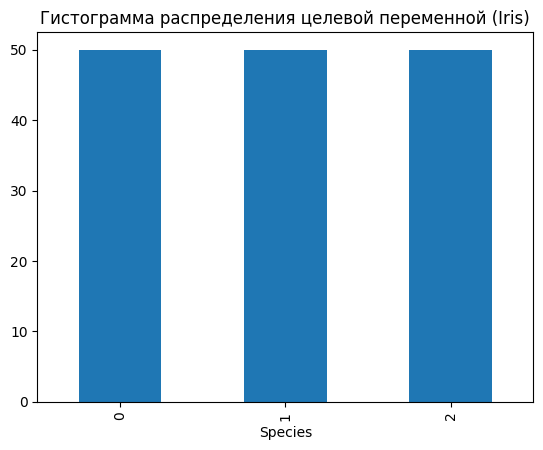

In [ ]:
iris_data['Species'].value_counts().plot(kind='bar');
plt.title('Гистограмма распределения целевой переменной (Iris)')

2. Разделение данных на обучающую и тестовую выборки

In [ ]:
# Для данных о домах
X_house = house_data.drop("MEDV", axis=1)
y_house = house_data["MEDV"]
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(
    X_house, y_house, test_size=0.3, random_state=42
)

In [ ]:
# Для данных об ирисах
X_iris = iris_data.drop("Species", axis=1)
y_iris = iris_data["Species"]
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

3. Создание и обучение модели регрессии

In [ ]:
# Создание модели линейной регрессии
model_regression = LinearRegression()

In [ ]:
# Обучение модели на обучающей выборке
model_regression.fit(X_house_train, y_house_train)

LinearRegression()

4. Оценка качества модели регрессии

In [ ]:
# Предсказание на тестовой выборке
y_house_pred = model_regression.predict(X_house_test)

In [ ]:
# Вычисление метрик качества
mae = mean_absolute_error(y_house_test, y_house_pred)
11
mse = mean_squared_error(y_house_test, y_house_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_house_test, y_house_pred)
# Вывод результатов
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")


MAE: 3.18
MSE: 21.91
RMSE: 4.68
R^2: 0.71


Эти данные позволяют сделать следующие выводы:

Rjhtym cреднеквадратической ошибки (RMSE): 4.67

 RMSE  - это мера того, насколько хорошо модель предсказывает фактические значения.
 Чем меньше RMSE, тем лучше модель.


Коэффициент детерминации (R^2): 0.71

 R^2  - это мера того, насколько хорошо модель объясняет изменения в данных.
 R^2 принимает значения от 0 до 1. Чем ближе R^2 к 1, тем лучше модель объясняет данные.
 В данном случае R^2 равен 0.71, что означает, что модель объясняет 71% изменений в данных.
 Это хороший показатель, так как  R^2 больше 0.5, что свидетельствует о том, что модель достаточно хорошо объясняет данные.

Вывод:

 Модель достаточно неплохо предсказывает фактические значения, но есть пространство для улучшения.
 R^2 показывает, что модель хорошо объясняет изменения в данных.
 Для более точной оценки качества модели необходимо знать конкретную задачу и тип данных.

Рекомендуемые действия:

 Сравнить эту модель с другими моделями, чтобы оценить ее эффективность.
 Попробовать улучшить модель, например, добавив новые переменные или изменив алгоритм.
 Проанализировать остатки модели, чтобы проверить,  есть ли какие-то систематические ошибки.

5. Создание и обучение модели классификации

In [ ]:
# Создание модели k-ближайших соседей
model_classification = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Обучение модели k-neibours на обучающей выборке
model_classification.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(n_neighbors=2)

6. Оценка качества модели классификации

**K-neibours**

In [ ]:
# Предсказание на тестовой выборке
y_iris_pred1 = model_classification.predict(X_iris_test)

In [ ]:
# Вычисление метрик качества
accuracy = accuracy_score(y_iris_test, y_iris_pred1)
precision = precision_score(y_iris_test, y_iris_pred1, average="macro")
recall = recall_score(y_iris_test, y_iris_pred1, average="macro")
f1 = f1_score(y_iris_test, y_iris_pred1, average="macro")
confusion_mat = confusion_matrix(y_iris_test, y_iris_pred1)


In [ ]:
print(f"Точность: {accuracy:.2f}")
print(f"Точность (Precision): {precision:.2f}")
print(f"Полнота (Recall): {recall:.2f}")
print(f"F1-мера: {f1:.2f}")
print("Матрица ошибок:\n", confusion_mat)

Точность: 1.00
Точность (Precision): 1.00
Полнота (Recall): 1.00
F1-мера: 1.00
Матрица ошибок:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
print(classification_report(y_iris_test, y_iris_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
import seaborn as sns

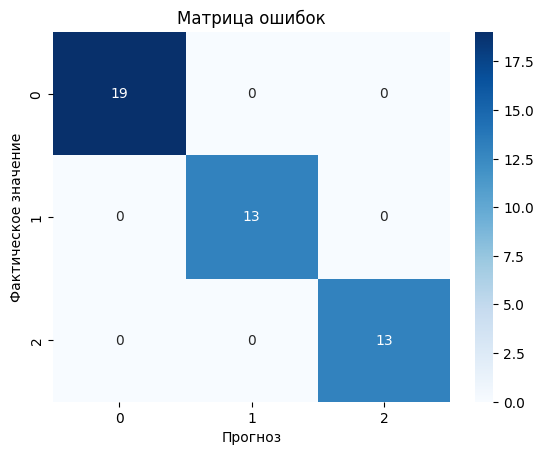

In [ ]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

Эти данные показывают идеальную производительность модели.

Объяснение:

 Точность (Precision)  = 1.00 означает, что все предсказанные положительные случаи были действительно положительными. Другими словами, модель не сделала ни одной ложноположительной ошибки.
 Полнота (Recall) = 1.00 означает, что модель нашла все положительные случаи. Другими словами, модель не пропустила ни одного положительного случая.
 F1-мера = 1.00  является гармоническим средним точности и полноты. Поскольку оба показателя равны 1.00, F1-мера также равна 1.00, что подтверждает идеальную производительность модели.

В целом, данные указывают на то, что модель прекрасно справляется с задачей классификации и не делает ошибок.

Однако, важно учитывать контекст:

 Размер выборки: Идеальные показатели могут быть достигнуты на очень маленькой выборке.
 Сложность задачи: Простые задачи классификации могут быть легко решены даже простыми моделями.
 Сбалансированность данных: Идеальные показатели могут быть достигнуты, если данные сильно сбалансированы (т.е. количество положительных и отрицательных примеров одинаково).

Важно проверить эти показатели на разных выборках данных (например, на тестовой выборке), чтобы убедиться, что модель действительно работает хорошо и не переобучается.

**Интерпретация confusion_matrix - в тестовой выборке все 19 объектов класса 0 были правильно отнесены к классу 0, все 13 объектов класса 1 были правильно отнесены к классу 1, все 13 объектов класса 2 были правильно отнесены к классу 2, неправильно классифицированных объектов не было.**